In [1]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import StandardScaler

In [2]:


# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)

# Create a Pandas DataFrame from the dataset
data = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target variable to the DataFrame
data['target'] = housing.target

# 1. Normalize each feature using StandardScaler
scaler = StandardScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])

# 2. Identify and drop extreme values (outliers)
# You can define a threshold to determine what is considered an extreme value.
# For example, you can use a z-score to detect outliers beyond a certain threshold.

threshold = 3  # Adjust this threshold as needed

# Calculate z-scores for each feature
z_scores = (data[data.columns[:-1]] - data[data.columns[:-1]].mean()) / data[data.columns[:-1]].std()

# Create a boolean mask for extreme values
outlier_mask = (z_scores.abs() < threshold).all(axis=1)

# Filter the DataFrame to remove rows with extreme values
data = data[outlier_mask]
data = data.reset_index(drop=True)

# Now, data contains the normalized features, and extreme values have been removed.


In [3]:
import sys
sys.path.append('..')
from xDL.models.NAM import NAM

In [4]:
nam = NAM(
    "target ~  -1 + PolynomialSplineNet(Longitude; degree=8) + CubicSplineNet(AveRooms; n_knots=8)+ CubicSplineNet(MedInc; n_knots=8) + CubicSplineNet(Latitude; n_knots=8) ", 
    data=data, 
    feature_dropout=0.0001
    )

--- Preprocessing ---


5it [04:43, 56.76s/it]
4it [00:13,  3.45s/it]


------------- Network architecture --------------
Longitude -> PolynomialSplineNet(feature=Longitude, n_params=648) -> output dimension=1
AveRooms -> CubicSplineNet(feature=AveRooms, n_params=648) -> output dimension=1
MedInc -> CubicSplineNet(feature=MedInc, n_params=648) -> output dimension=1
Latitude -> CubicSplineNet(feature=Latitude, n_params=648) -> output dimension=1


In [5]:
nam.training_dataset

<_PrefetchDataset element_spec=({'Longitude': TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), 'AveRooms': TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), 'MedInc': TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), 'Latitude': TensorSpec(shape=(None, 8), dtype=tf.float64, name=None)}, TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [6]:
nam.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error")

# Train the model
nam.fit(nam.training_dataset, epochs=50, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/50


16/16 [==============================] - 2s 20ms/step - loss: 34.6929 - val_loss: 11.7554
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 5.1590 - val_loss: 1.2526
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 1.2910 - val_loss: 0.7409
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.7373 - val_loss: 0.8536
Epoch 5/50
16/16 [==============================] - 0s 9ms/step - loss: 0.6672 - val_loss: 0.6270
Epoch 6/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5907 - val_loss: 0.5810
Epoch 7/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5695 - val_loss: 0.5655
Epoch 8/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5660 - val_loss: 0.5542
Epoch 9/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5529 - val_loss: 0.5668
Epoch 10/50
16/16 [==============================] - 0s 10ms/step - loss: 0.5343 - val_loss: 0.5249
Epoch 11/50
16/16 [=======

16/16 [==============================] - 0s 4ms/step


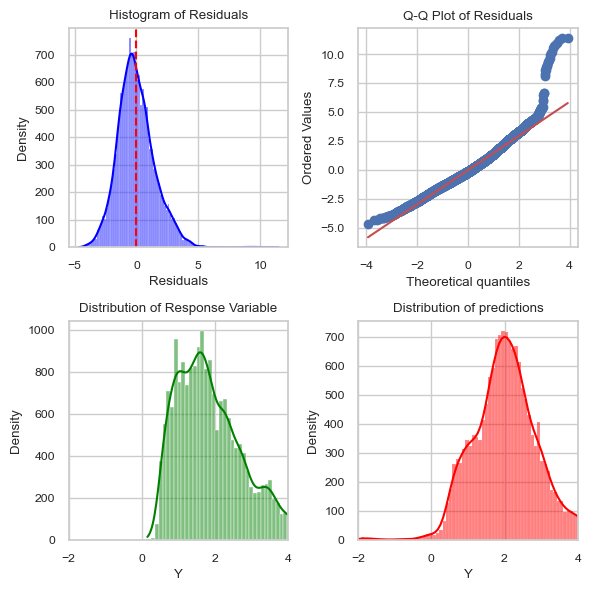

In [7]:
nam.analytics_plot()

In [8]:
nam.inputs

{'Longitude': <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'Longitude')>,
 'AveRooms': <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'AveRooms')>,
 'MedInc': <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'MedInc')>,
 'Latitude': <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'Latitude')>}

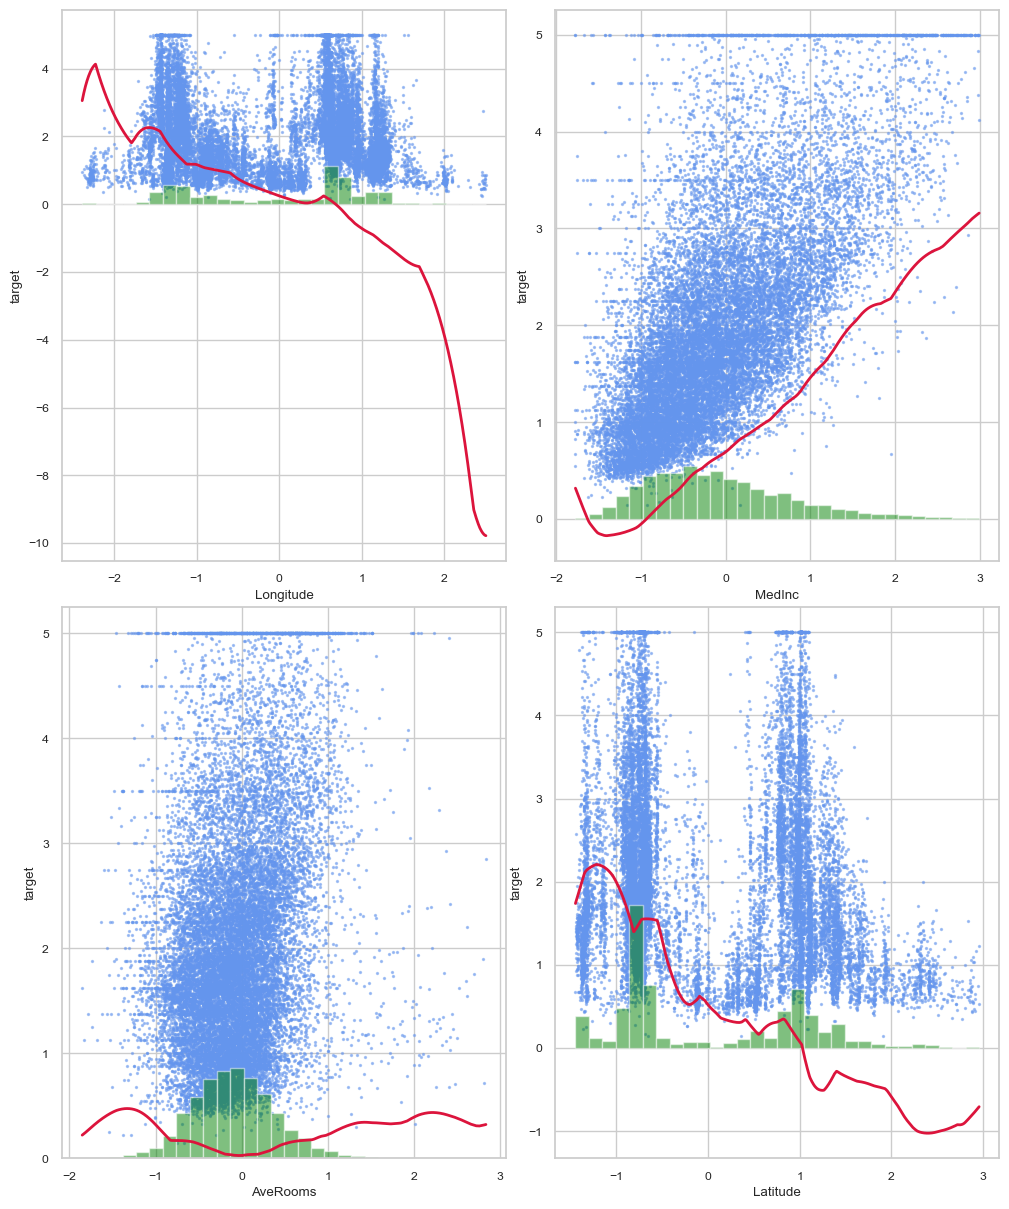

In [9]:
nam.plot()